# Linear Regression

* Yksi yksinkertaisimmista ja yleisimmistä algoritmeista
* Pyritään ennustamaan jotakin arvoa
* Lineaarinen ennustaa jotakin lukua, looginen kyllä/ei
* Regressio voi olla lineaarinen (suora viiva) tai ei-lineaarinen (kaari)

In [ ]:
http://dy.fi/dtf

https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

### Linear Regression

In [1]:
#Kirjastot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Määritetään asetukset matplotlibille
%matplotlib inline

In [3]:
#Haetaan data
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# dataframen muoto
data.shape

(200, 4)

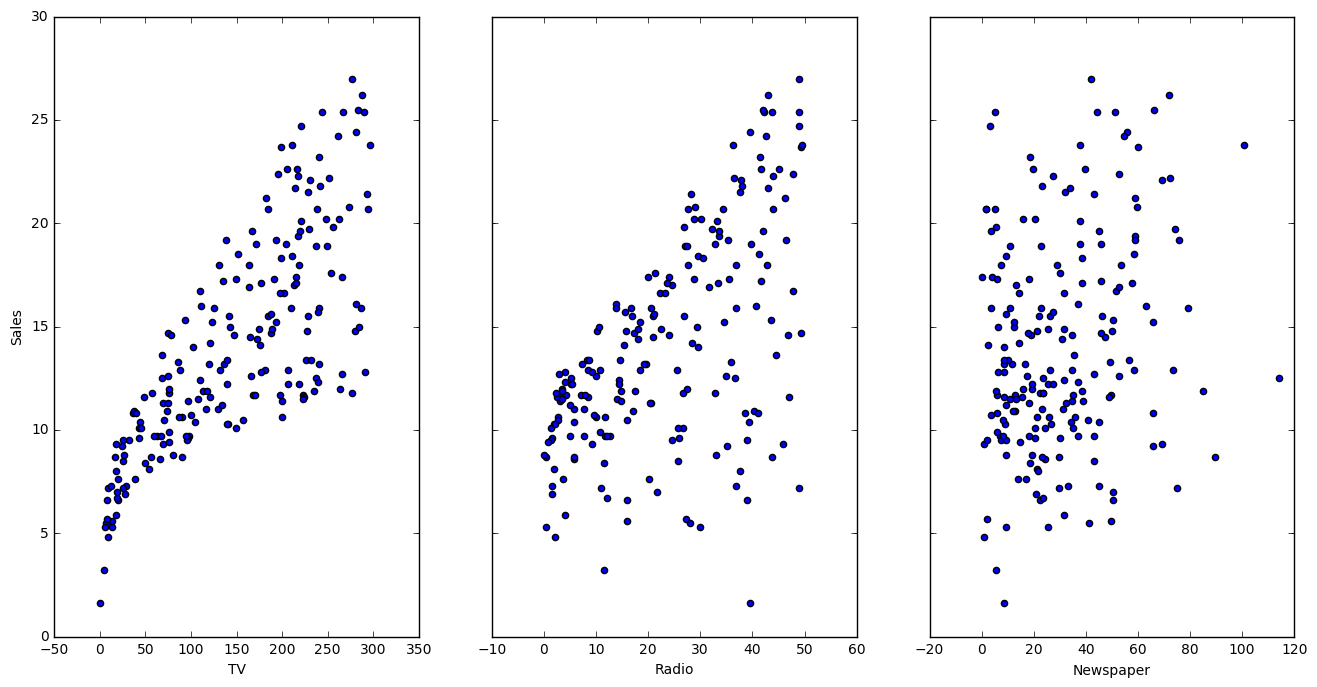

In [6]:
# EDA-visualisointia
fig, axs = plt.subplots(1, 3, sharey = True)
data.plot(kind='scatter', x = 'TV', y = 'Sales', ax = axs[0], figsize = (16, 8))
data.plot(kind='scatter', x = 'Radio', y = 'Sales', ax = axs[1])
data.plot(kind='scatter', x = 'Newspaper', y = 'Sales', ax = axs[2])

In [15]:
# määritetään kertoimet
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales ~ TV", data = data).fit()

lm.params
#lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 03 Nov 2016   Prob (F-statistic):           1.47e-42
Time:                        09:19:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# montako tuotetta saataisiin myytyä, jos tv-mainointaan käytetään 50 tuhatta
7.032594 + 0.047537 * 50

9.409444

In [9]:
# luodaan dataframe testidatalle
X_new = pd.DataFrame({
        "TV": [50]
})
X_new.head()

,TV
0,50


In [10]:
# testataan
lm.predict(X_new)

array([ 9.40942557])

In [11]:
X_new = pd.DataFrame({
        "TV": [data.TV.min(), data.TV.max()]
})
X_new.head()

,TV
0,0.7
1,296.4


In [13]:
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

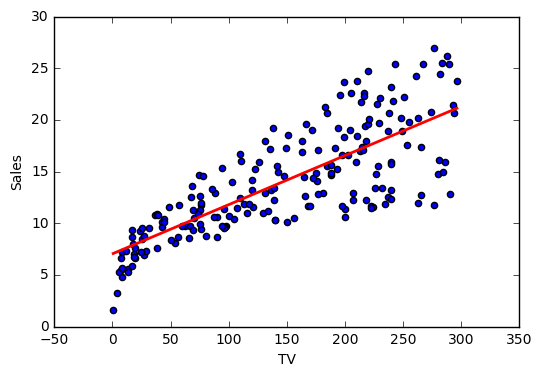

In [14]:
data.plot(kind='scatter', x = "TV", y = "Sales")
plt.plot(X_new, preds, c="red", linewidth = 2)

### Multiple Linear Regression

In [16]:
lm = smf.ols(formula = "Sales ~ TV + Radio + Newspaper", data = data).fit()
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

### scikit-learn

In [17]:
# luodaan x ja y
feature_cols = ["TV", "Radio", "Newspaper"]
x = data[feature_cols]
y = data.Sales

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)

# tulokset
print(lm.intercept_)
print(lm.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
# paritetaan medianimet kertoimiin
zip(feature_cols, lm.coef_)

lm.predict([100, 25, 25])

# Logistic Regression

http://dy.fi/dnm

http://blog.yhat.com/posts/logistic-regression-and-python.html

In [21]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [22]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [24]:
df.columns = ["admit", "gre", "gpa", "prestige"]

In [25]:
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [26]:
# perustietoa numeraalisista sarakkeista
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [27]:
# tehtävä: selvitä mitä standard deviation tarkoittaa
df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

In [28]:
# frekvenssitaulu prestigen vaikutuksesta admittiin
pd.crosstab(df["admit"], df["prestige"], rownames = ["admit"])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


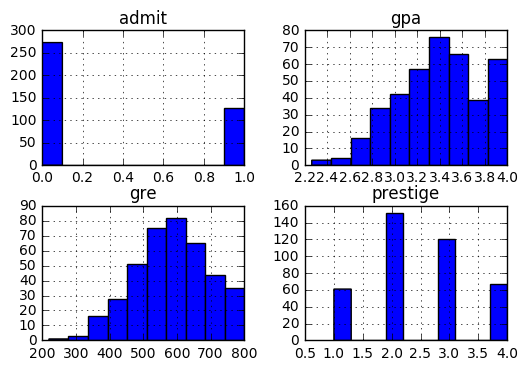

In [29]:
# visualisointi
df.hist()
pl.show()